In [2]:
n_threads = 4
from multiprocessing import Process, Lock, Pool
def f(l, i):
    l.acquire()
    print 'hello world', i
    l.release()

lock = Lock()
for num in range(n_threads):
    Process(target=f, args=(lock, num)).start()

hello world 0
hello world 1
hello world 2
hello world 3


In [13]:
n_threads = 4
from multiprocessing import Process, Lock, Manager

result = []
counter = 0

def f(l, n):
    global result, counter
    
    o = range(10*n, 10*n + 10)
    l.acquire()
    print n, "|", o
    result += o
    l.release()

    
manager = Manager()
lock = Lock()
for num in range(n_threads):
    p = Process(target=f, args=(lock, num)).start()
    
print result

0 | [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[]
1 | [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
2 | [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
3 | [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [14]:
n_threads = 4
from threading import Thread, Lock

result = []
counter = 0

def f(l, n):
    global result, counter
    
    o = range(10*n, 10*n + 10)
    l.acquire()
    print n, "|", o
    result += o
    l.release()

    
manager = Manager()
lock = Lock()
for num in range(n_threads):
    t = Thread(target=f, args=(lock, num)).start()
    
print result

0 | [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
1 | [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
2 | [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
3 | [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [1]:
import numpy as np


In [15]:
m1 = np.random.normal(5, 2, 1000)
m2 = np.random.normal(5, 2, 1000)
m3 = m1 + m2
mu = 5 + 5
sigma = np.sqrt(2**2 + 2**2)

In [16]:
import matplotlib.pylab as plt
%matplotlib inline

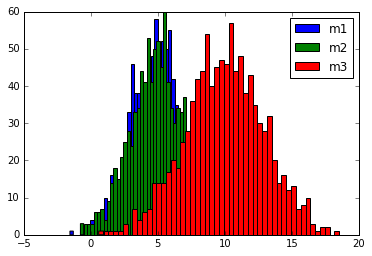

In [17]:
plt.figure()
_ = plt.hist(m1, bins=50, label='m1')
_ = plt.hist(m2, bins=50, label='m2')
_ = plt.hist(m3, bins=50, label='m3')
plt.legend()

In [20]:
print np.mean(m3), np.std(m3, ddof=1), mu, sigma

9.95653884386 2.91652482367 10 2.82842712475


In [21]:
print abs(mu - np.mean(m3))
print abs(sigma - np.std(m3, ddof=1))

0.0434611561431
0.08809769892


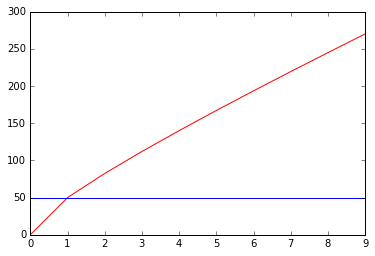

In [35]:
mu = 20
sigma = 10
n = np.arange(0,10)
A = 50
y = mu*n + 3*sigma*np.sqrt(n)
plt.figure()
plt.plot(n, y, '-r')
plt.plot(n, A*np.ones_like(y), '-b')

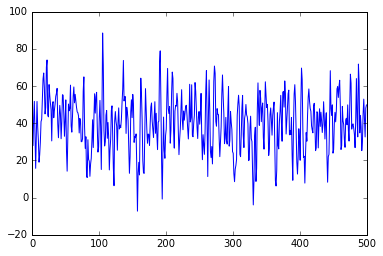

In [37]:
m1 = np.random.normal(mu, sigma, 1000)
n = 2
y = [np.sum(m1[i:i+n]) for i in range(500)]
plt.plot(y)

In [33]:
def compute_normal_identical(mu, sigma, a=50):
    """
    Solve n*mu + 3*sigma*sqrt(n) < a
    return: n, Mu, Sigma
    """
    for n in range(100):
        y = mu*n + 3.0*sigma*np.sqrt(n)
        if y > a:
            break  
    n -= 1
    m = n*mu
    s = sigma*np.sqrt(n)
    return n, m, s


print compute_normal_identical(5, 2, 50)
print compute_normal_identical(1, 0.3, 50)
print compute_normal_identical(20, 10, 50)
print compute_normal_identical(10, 5, 50)

(6, 30, 4.8989794855663558)
(44, 44, 1.9899748742132397)
(1, 20, 10.0)
(2, 20, 7.0710678118654755)


In [39]:
m1 = 47 * np.random.beta(0.5, 0.5, 1000)
m2 = 47 * np.random.beta(0.5, 0.5, 1000)
m3 = m1 + m2

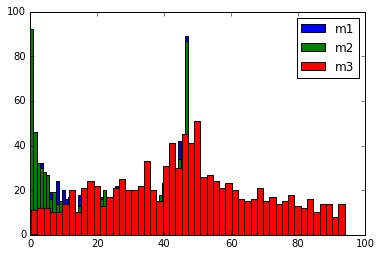

In [40]:
plt.figure()
_ = plt.hist(m1, bins=50, label='m1')
_ = plt.hist(m2, bins=50, label='m2')
_ = plt.hist(m3, bins=50, label='m3')
plt.legend()